In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from vega_datasets import data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
movies_data = data.movies()

In [ ]:
movies_data.head()

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time min,Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0


In [ ]:
movies_data.dropna(inplace=True)

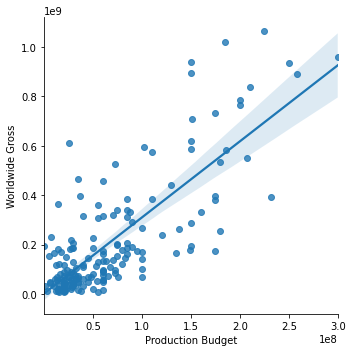

In [ ]:
sns.lmplot(x='Production Budget', y='Worldwide Gross', data=movies_data)

In [ ]:
y = movies_data['Worldwide Gross']
y

1064     18184083.0
1074    766812167.0
1090    456068181.0
1095     69791889.0
1107     32955399.0
           ...     
3158     43236603.0
3181     57604723.0
3183    225990976.0
3195     98690286.0
3196     36851125.0
Name: Worldwide Gross, Length: 174, dtype: float64

In [ ]:
X =  movies_data[['Production Budget', 'IMDB Rating']]
X

,Production Budget,IMDB Rating
1064,20000000.0,5.4
1074,200000000.0,6.2
1090,60000000.0,7.8
1095,48000000.0,7.9
1107,30000000.0,5.9
...,...,...
3158,6000000.0,8.2
3181,60000000.0,5.0
3183,50000000.0,7.0
3195,23600000.0,7.8


In [ ]:
X = sm.add_constant(X)
X

,const,Production Budget,IMDB Rating
1064,1.0,20000000.0,5.4
1074,1.0,200000000.0,6.2
1090,1.0,60000000.0,7.8
1095,1.0,48000000.0,7.9
1107,1.0,30000000.0,5.9
...,...,...,...
3158,1.0,6000000.0,8.2
3181,1.0,60000000.0,5.0
3183,1.0,50000000.0,7.0
3195,1.0,23600000.0,7.8


In [ ]:
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide Gross   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     154.4
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           4.91e-39
Time:                        03:51:53   Log-Likelihood:                -3510.8
No. Observations:                 174   AIC:                             7028.
Df Residuals:                     171   BIC:                             7037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.267e+08   6.77e+0

# Dummies - Genre

In [ ]:
distrib_dummies = pd.get_dummies(movies_data['Distributor'])
distrib_dummies

,20th Century Fox,Dreamworks SKG,Focus Features,Fox Searchlight,Lionsgate,MGM,Miramax,New Line,Newmarket Films,Overture Films,Paramount Pictures,Paramount Vantage,Rocky Mountain Pictures,Samuel Goldwyn Films,Sony Pictures,Sony Pictures Classics,Sony/Screen Gems,Summit Entertainment,United Artists,Universal,Walt Disney Pictures,Warner Bros.,Weinstein Co.
1064,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1095,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
X = X.join(distrib_dummies)
X

,const,Production Budget,IMDB Rating,20th Century Fox,Dreamworks SKG,Focus Features,Fox Searchlight,Lionsgate,MGM,Miramax,New Line,Newmarket Films,Overture Films,Paramount Pictures,Paramount Vantage,Rocky Mountain Pictures,Samuel Goldwyn Films,Sony Pictures,Sony Pictures Classics,Sony/Screen Gems,Summit Entertainment,United Artists,Universal,Walt Disney Pictures,Warner Bros.,Weinstein Co.
1064,1.0,20000000.0,5.4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1074,1.0,200000000.0,6.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1090,1.0,60000000.0,7.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1095,1.0,48000000.0,7.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1107,1.0,30000000.0,5.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1.0,6000000.0,8.2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3181,1.0,60000000.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3183,1.0,50000000.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3195,1.0,23600000.0,7.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Worldwide Gross   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     17.02
Date:                Fri, 26 Jun 2020   Prob (F-statistic):           1.59e-31
Time:                        03:57:49   Log-Likelihood:                -3485.8
No. Observations:                 174   AIC:                             7022.
Df Residuals:                     149   BIC:                             7101.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -